In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools

In [3]:
np.random.seed(42) 

# Gradient Descent Notes

## Gradient Descent

Gradient descent is an optimization technique that can find the minimum of an objective function. 

In [6]:
x = np.linspace(-5, 5, 20)
y = 2 * x + 3
y_noise = np.random.normal(loc = 0, scale = 2.5, size = len(x))
y += y_noise

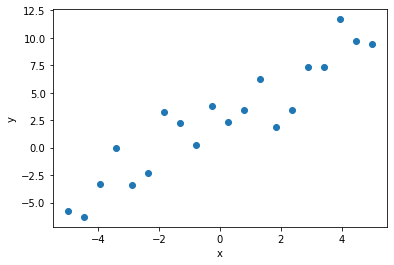

In [7]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Gradient descent with Logistic Regression - basic line

We want to find a line that will describe the connection between our two variables - x and y. We make an assumption that a linear modeling function will be a good enough model to describe them.

Equation of a line: $y = ax + b$
* a - the slope $a = \frac{y_2 - y_1}{x_2 - x_1} = \frac{change in y}{change in x}$
* b - y intercept

m - the number of the training examples
n = 2 - the number of the features - a, b => two weights/thetas

In [8]:
def linear_regression_gradient_descent(x, y, a_guess, b_guess, learning_rate, max_iterations):
    def perform_single_step(x, y, a, b, learning_rate):
        m = len(x)
        dJ_da = - 2/m * np.sum(x * (y - a * x - b))
        dJ_db = - 2/m * np.sum(y - a * x - b)
        
        a_new = a - learning_rate * dJ_da
        b_new = b - learning_rate * dJ_db
                               
        return(a_new, b_new)
    
    for step in range(max_iterations):
        a_guess, b_guess = perform_single_step(x, y,
                                               a_guess, b_guess,
                                               learning_rate)
    return (b_guess, a_guess)

In [9]:
learning_rate = 0.01
number_iterations = 1000

In [10]:
line_parameters = linear_regression_gradient_descent(x, y, -10, 20, learning_rate, number_iterations)
print("m and b:", line_parameters)

m and b: (2.5717536257265983, 1.527067402482388)


### Gradient descent - general case in more dimensions

<b>Parameters:</b>

* Input - x -> a matrix m x n (m training examples with n features)
* Output - y -> m vector
* Weights - thetas -> n

<b>Functions:</b>
* Hypothesis function:
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $$
$$ h(x) = \sum_{i=0}^{n} x_{i}\theta_{i}  = \theta^T x $$
(as $x_{0} = 1$ - the intercept term)

* Cost 

The mean squared error (MSE) of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

$$ J(\theta) = 1/m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 $$

* Gradient 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = 2/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).x_j^{(i)} $$

* Update weights with gradients
$$ \theta_j: = \theta_j -\alpha . (2/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).x_{j}^{(i)}) $$


In [11]:
def gradient_descent(X, y,
                     initial_weights,
                     cost_function,
                     gradient_cost_function,
                     max_iterations,
                     threshold,
                     learning_rate=0.05):
    
    w = initial_weights
    cost_function_history = cost_function(X, y, w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while i < max_iterations and diff > threshold:
        delta_w = -learning_rate * gradient_cost_function(X, y, w)
        w = w + delta_w
        
        cost_function_history = np.vstack((cost_function_history, 
                                           cost_function(X, y, w)))
        
        i+=1
        diff = np.absolute(cost_function_history[-1] - cost_function_history[-2])
    
    return w, cost_function_history

In [12]:
x = np.array([[xi] for xi in x])
x = np.hstack((np.ones((len(x),1)),x))

In [13]:
x.shape

(20, 2)

In [14]:
def gradient_mse(x, y, w):
    m = len(x)
    predicted = x.dot(w)
    grad = (2/m) * (predicted-y).dot(x)
    return grad

def mse(x, y, w):
    m = len(x)
    predicted = x.dot(w)
    mse = (1/m) * (predicted-y).T.dot(predicted-y)
    return mse  

w_init = np.array([-10, 20])

weights, cost_function_history = gradient_descent(x, y, w_init, 
                                                  mse, gradient_mse,
                                                  1000, 0.000000001)
print("Weights (theta1, theta2):", weights)
print("Minimum cost function:", cost_function_history[-1][0])

Weights (theta1, theta2): [2.57169172 1.5270674 ]
Minimum cost function: 3.4122494175518003


Bibliography:

Gradient Descent

* https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
* https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
* https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb#scrollTo=KdAHnLQKY9ao
